In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('Wine.csv')
df.head(10)
from sklearn.preprocessing import StandardScaler
df_st = StandardScaler().fit_transform(df)
df_st = pd.DataFrame(df_st, columns = df.columns)
df_st

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,-1.213944
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.213944
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.213944
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,1.373864
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,1.373864
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,1.373864
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,1.373864


In [2]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

gmm = GaussianMixture(n_components=3).fit(df_st)
cluster = gmm.predict(df_st)
cluster
print(silhouette_score(df_st,cluster))

0.3045773693648975


In [3]:
means = gmm.means_
means

array([[-0.89171997, -0.36236171, -0.44495778,  0.22313708, -0.36456713,
        -0.05806709,  0.05177999,  0.01456883,  0.069002  , -0.85279882,
         0.43361057,  0.24529431, -0.72410998,  0.07996036],
       [ 0.18915862,  0.89533073,  0.25794454,  0.57706453, -0.03012665,
        -0.98761685, -1.25276105,  0.6901194 , -0.76628663,  1.01141787,
        -1.20538229, -1.31094994, -0.37257757,  1.37386437],
       [ 0.91919498, -0.29234227,  0.32560449, -0.73799712,  0.4632262 ,
         0.87336224,  0.95688391, -0.57898505,  0.54038332,  0.20340098,
         0.45884745,  0.77135086,  1.17450054, -1.21394365]])

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters = 3, n_init="auto",random_state=420).fit(df_st)
cluster2 = kmeans.predict(df_st)
cluster2
print(silhouette_score(df_st,cluster2))

0.3064839832483345


In [5]:
centroids  = kmeans.cluster_centers_ 
centroids

array([[ 1.86543138e-01,  9.04971453e-01,  2.49210264e-01,
         5.83703484e-01, -5.06353947e-02, -9.88556997e-01,
        -1.23619475e+00,  7.16841717e-01, -7.49607560e-01,
         9.88498285e-01, -1.19129878e+00, -1.30153966e+00,
        -3.80044610e-01,  1.34745816e+00],
       [ 8.35232085e-01, -3.03809683e-01,  3.64706042e-01,
        -6.10191294e-01,  5.77586799e-01,  8.85237363e-01,
         9.77819557e-01, -5.62089654e-01,  5.80286581e-01,
         1.71063479e-01,  4.73983650e-01,  7.79247107e-01,
         1.12518529e+00, -1.15133539e+00],
       [-9.09328403e-01, -3.80707476e-01, -5.19747426e-01,
         1.37767008e-01, -4.97451451e-01, -9.62003532e-02,
        -7.65223671e-04, -4.11471063e-03,  1.12388425e-02,
        -8.81229129e-01,  4.32636626e-01,  2.30777949e-01,
        -7.63273163e-01,  7.99603601e-02]])

[0.2861665011841207, 0.3064839832483345, 0.305863195588693, 0.23387987416955988, 0.20622357369964797, 0.20358174312998245, 0.1358721175513244, 0.13421536734567266, 0.13352440437221666, 0.13730715128024734, 0.1476274440097365, 0.14550461274173646, 0.1496990261216524, 0.14584324159300782, 0.14796979290144383, 0.15094285628541082, 0.14263464683492408, 0.14106701181671194]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


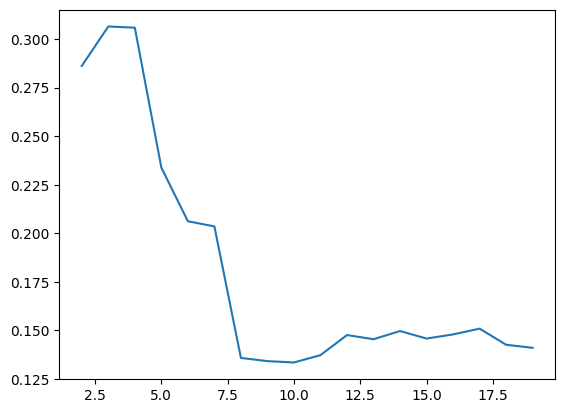

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

lista = []
for i in range(2,20):
    kmeans = KMeans(n_clusters = i, n_init="auto",random_state=420).fit(df_st)
    cluster2 = kmeans.predict(df_st)
    alfa = silhouette_score(df_st,cluster2)
    lista.append(alfa)
print(lista)
l = list(range(2,20))
print(l)
xpoints = l
ypoints = lista

plt.plot(xpoints, ypoints)
plt.show()

[0.2771388003059472, 0.3032582373900497, 0.2549853016585916, 0.23778723439220617, 0.1319987119149006, 0.2042176123893739, 0.11576877084100246, 0.11208168032889979, 0.12116286225836835, 0.16197938904247816, 0.13402787041202513, 0.14834096125646096, 0.12658742234852655, 0.1360255960106427, 0.13837835576779184, 0.14257982775442404, 0.12714243691338856, 0.12349304138029106]


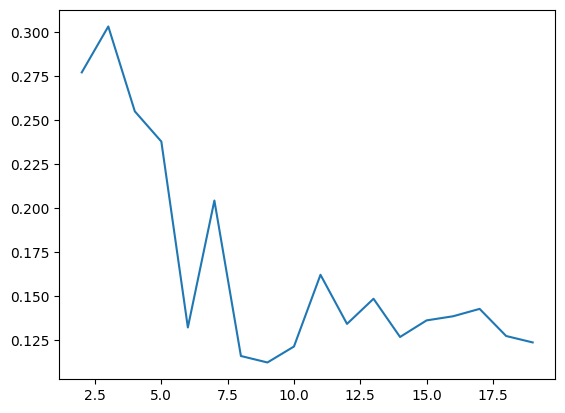

In [7]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

lista2 = []
for i in range(2,20):
    gaus = GaussianMixture(n_components=i).fit(df_st)
    cluster3 =gaus.predict(df_st)
    beta = silhouette_score(df_st,cluster3)
    lista2.append(beta)
print(lista2)
l = list(range(2,20))
xpoints = l
ypoints = lista2

plt.plot(xpoints, ypoints)
plt.show()

In [8]:
centroids  = kmeans.cluster_centers_ 
centroids

array([[ 1.12332775, -0.59366801,  1.10933436,  1.27772951, -0.43824169,
         0.64876424, -0.82753931,  1.31459937,  1.58406123,  3.16507569,
        -1.69987192, -1.0475882 , -0.34040091,  1.37386437],
       [ 1.00968338, -0.23998873, -0.12617087, -0.97741078,  1.23985715,
         1.05094946,  1.04084276, -0.98993316,  0.84643381,  0.28805273,
        -0.00635918,  1.13039862,  0.57195654, -1.21394365],
       [-0.80031669, -0.61570156, -1.32811342, -0.37110808, -0.81484052,
         0.09741652,  0.1782528 , -0.51672019,  0.06532285, -0.79529913,
         0.76700898,  0.48041811, -0.8306682 ,  0.07996036],
       [-1.24983423, -0.51419842,  0.19119873,  0.71866951, -0.73355074,
        -0.76788536, -0.35360796,  0.98991719, -0.24480541, -0.98517885,
         0.76116702, -0.07134096, -0.71898102,  0.07996036],
       [-0.80368559, -0.15044683,  0.14523819,  0.78038249, -0.5172317 ,
         0.36935768,  0.35965134, -0.2717812 ,  0.1068353 , -0.96840086,
        -0.11220372,  0.62

In [9]:
# Table for GaussianMixture
new_df = pd.DataFrame(means ,columns = df.columns)
new_df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,-0.891720,-0.362362,-0.444958,0.223137,-0.364567,-0.058067,0.051780,0.014569,0.069002,-0.852799,0.433611,0.245294,-0.724110,0.079960
1,0.189159,0.895331,0.257945,0.577065,-0.030127,-0.987617,-1.252761,0.690119,-0.766287,1.011418,-1.205382,-1.310950,-0.372578,1.373864
2,0.919195,-0.292342,0.325604,-0.737997,0.463226,0.873362,0.956884,-0.578985,0.540383,0.203401,0.458847,0.771351,1.174501,-1.213944


In [ ]:
# Table for KMeans
new_df = pd.DataFrame(centroids ,columns = df.columns)
new_df